In [30]:
from paddleocr import PaddleOCR, draw_ocr

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(
    use_angle_cls=True,
    rec=True,
    lang="ru",
    rec_algorithm='SVTR_LCNet', 
    rec_model_dir='./inference/svtr_kz',
    rec_char_dict_path='/home/bma/bma/PaddleOCR_Mukhtar/ppocr/utils/dict/kz_dict.txt',
)  # need to run only once to download and load model into memory

[2023/07/09 20:12:36] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/bma/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='./inference/svtr_kz', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/bma/bma/Pad

In [48]:
img_path = './train_data/Exam2.png'
result = ocr.ocr(img_path,  rec=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/07/09 20:40:48] ppocr DEBUG: dt_boxes num : 93, elapse : 0.20746946334838867
[2023/07/09 20:40:48] ppocr DEBUG: cls num  : 93, elapse : 0.12736773490905762
[2023/07/09 20:40:49] ppocr DEBUG: rec_res num  : 93, elapse : 0.2874760627746582
[[[29.0, 0.0], [77.0, 14.0], [66.0, 51.0], [18.0, 35.0]], ('Опер', 0.9963862895965576)]
[[[69.0, 21.0], [137.0, 21.0], [137.0, 50.0], [69.0, 50.0]], ('ыуывто', 0.8246886730194092)]
[[[161.0, 24.0], [245.0, 31.0], [242.0, 64.0], [159.0, 58.0]], ('зерттеу', 0.9997148513793945)]
[[[270.0, 32.0], [363.0, 32.0], [363.0, 53.0], [270.0, 53.0]], ('бойынша', 0.9984015226364136)]
[[[391.0, 31.0], [426.0, 31.0], [426.0, 66.0], [391.0, 66.0]], ('біз', 0.9998305439949036)]
[[[21.0, 47.0], [90.0, 62.0], [83.0, 97.0], [14.0, 82.0]], ('әдістер', 0.9385795593261719)]
[[[435.0, 38.0], [530.0, 32.0], [532.0, 63.0], [437.0, 69.0]], ('үйренген', 0.9966114163398743)]
[[[31.0, 111.0], [130.0, 133.0], [123.0, 165.0], [25.0, 143.0]], ('Жасалды', 0.8852218985557556)]
[[[1

In [49]:
result = result[0]

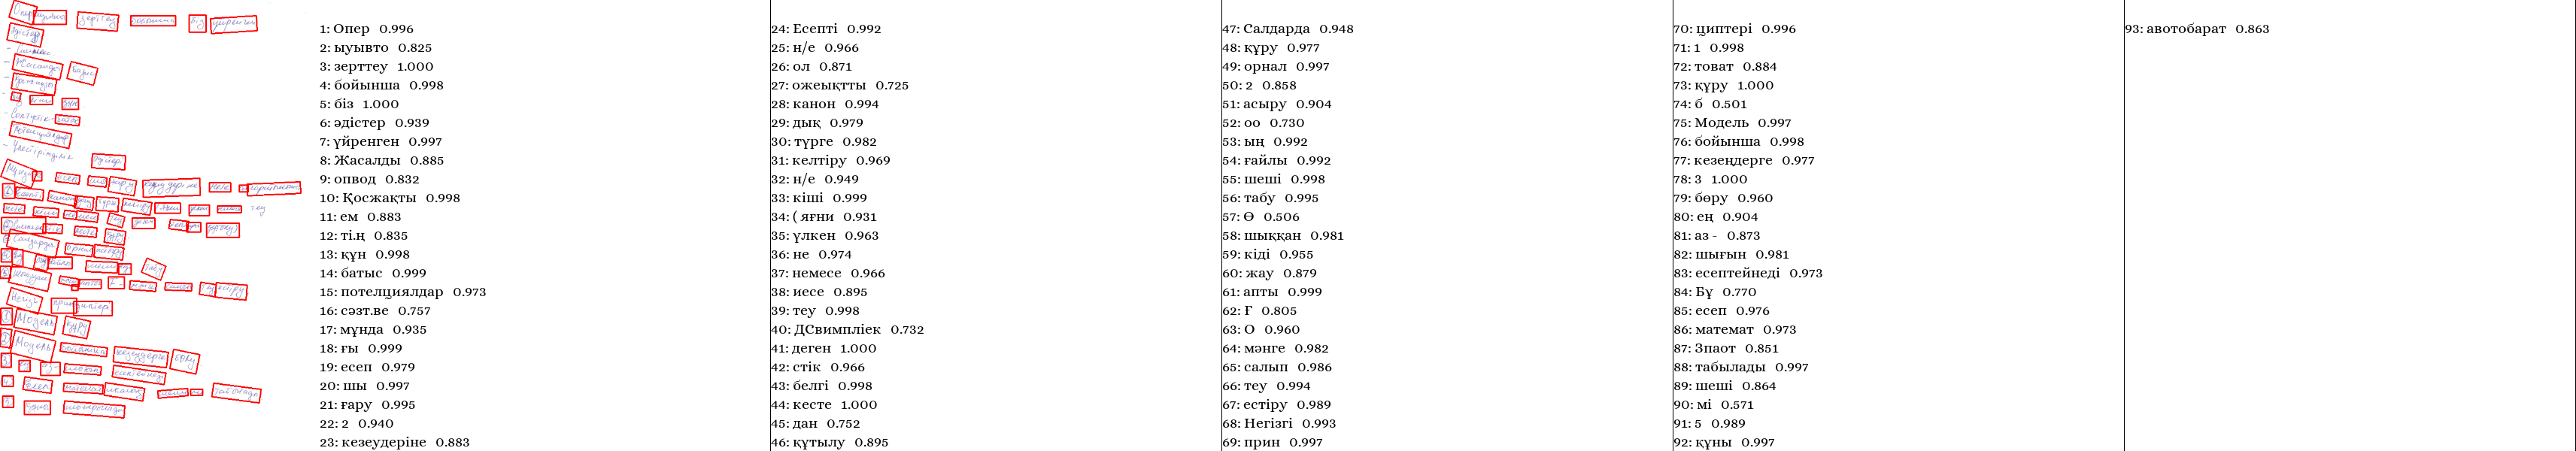

In [50]:
# draw result
from PIL import Image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
# rotate image 90 degrees
im_show = draw_ocr(image, boxes, txts, scores, font_path='./doc/fonts/kazakh.ttf')
im_show = Image.fromarray(im_show )

# show image in jupyter
im_show.show()